# Homework6: Data Collection

In [1]:
import csv
import json
import html
import time
import requests

from bs4 import BeautifulSoup
import pandas as pd

## LinkedIn 1:
Suppose that Integrify wants to get some insights for the Machine Learning and Data Science job market in order to build the best practice and update the curriculum to maximize the chance for getting as many job offers as possible for the students. 
Your tasks are the following:
- Each group member will be working on one country (Finland, Netherlands, Denmark, Sweden, and Germany)
- Use the following keyword sets and try to locate 20 companies in each country:

DataScience= [Data Science, Big data, Machine learning, Data mining, Artificial intelligence, Predictive modeling, Statistical analysis, Data visualization, Deep learning, Natural language processing, Business intelligence, Data warehousing, Data management, Data cleaning, Feature engineering, Time series analysis, Text analytics, Database, SQL, NoSQL, Neural networks, Regression analysis, Clustering, Dimensionality reduction, Anomaly detection, Recommender systems, Data integration, Data governance]

MachineLearning = [Machine learning, Data preprocessing, Feature selection, Feature engineering, Data visualization, Model selection, Hyperparameter tuning, Cross-validation, Ensemble methods, Neural networks, Deep learning, Convolutional neural networks, Recurrent neural networks, Natural language processing, Computer vision, Reinforcement learning, Unsupervised learning, Clustering, Dimensionality reduction, Bayesian methods, Time series analysis, Random forest, Gradient boosting, Support vector machines, Decision trees, Regression analysis]

- Collect all job offers of each company for a one-year time frame. 
- You will end up with a dictionary where the keys are the company names and the values are a list of dictionaries.
- The keys in the sub-dictionaries correspond to keywords, and the values correspond to the company’s posts that include those keywords. 
- In total, you will produce five dictionaries, each corresponding to one of the listed countries above. 
- Save each dictionary in JSON format under the name of the corresponding country.


I decided to avoid using Selenium so far and studied how the searching field in LinkedIn corresponds to an address bar. There is the article about this: https://www.scraperapi.com/blog/linkedin-scraper-python/

That's how API works with unsigned anonymous search.

Start parameter is about pagination of the response, each page has 25 items (it means if start=0 jobs 1-25 will be shown, if start=50 jobs 51-75 will be shown and so on)
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%20Science&location=Finland&locationId=&geoId=100456013&f_TPR=&position=1&pageNum=0&start=0

### METHOD DESCRIPTION
**Making a search by every keyword and extract all the results to the pivot table. Then choose and rearrange the data according to the assignment**

### CONTROL PANEL aka List of Parameters

In [203]:
# Global parameters

country = 'Finland'
pages_max = 10 # maximum of pages with job posts extracting per 1 keyword (each page contains max 25 posts)
request_and = False # if True the request will be 'Data AND Science' instead of just 'Data Science'
file_name = 'linked-in-jobs_data-science_' + country + '_AND=' + str(request_and) +'.csv'

# Keywords for searching requests

site = 'https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords={}&location={}&pageNum=0&start={}'

str_ds = 'Data Science, Big data, Machine learning, Data mining, Artificial intelligence, Predictive modeling, Statistical analysis, Data visualization, Deep learning, Natural language processing, Business intelligence, Data warehousing, Data management, Data cleaning, Feature engineering, Time series analysis, Text analytics, Database, SQL, NoSQL, Neural networks, Regression analysis, Clustering, Dimensionality reduction, Anomaly detection, Recommender systems, Data integration, Data governance'
str_ml = 'Machine learning, Data preprocessing, Feature selection, Feature engineering, Data visualization, Model selection, Hyperparameter tuning, Cross-validation, Ensemble methods, Neural networks, Deep learning, Convolutional neural networks, Recurrent neural networks, Natural language processing, Computer vision, Reinforcement learning, Unsupervised learning, Clustering, Dimensionality reduction, Bayesian methods, Time series analysis, Random forest, Gradient boosting, Support vector machines, Decision trees, Regression analysis'
DataScience = str_ds.split(', ')
MachineLearning = str_ml.split(', ')
united_set = set(DataScience) | set(MachineLearning)


### SCRAPING SCRIPT

In [97]:
# Creating a file and writing 6 titles

file = open(file_name, 'w')
writer = csv.writer(file)
writer.writerow(['Keyword' ,'Title', 'Company', 'Location', 'Link', 'Date'])

def scrape_jobs(keyword, n_max=pages_max*25):
    '''Extract the jobs from LinkedIn using keyword and write the job data with writer=csv.writer'''
    
    print()
    for i in range(0, n_max, 25):
        url = site.format(keyword, 'Finland', str(i))
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        
        soup = BeautifulSoup(response.content, 'html.parser')
        jobs = soup.find_all(class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')
        
        all = 0
        if len(jobs) == 0:
            print('break', end=' ')
            break
        else:
            all += len(jobs)
            print(all, end=' ')
        
        for job in jobs:
            job_title = job.find('h3', class_='base-search-card__title').text.strip()
            job_company = job.find('h4', class_='base-search-card__subtitle').text.strip()
            job_location = job.find('span', class_='job-search-card__location').text.strip()
            job_link = job.find('a', class_='base-card__full-link')['href'] if job.find('a', class_='base-card__full-link') else ' '
            job_date = job.find('time', class_="job-search-card__listdate")['datetime'] if job.find('time', class_="job-search-card__listdate") else ' '
            writer.writerow([keyword.replace('%20', ' ') ,job_title, job_company, job_location, job_link, job_date])
        time.sleep(0.15)
        

# initialization a cycle with keywords from the united_set        
        
separator = '%20AND%20' if request_and else '%20'
for item in united_set:
    print(item, '...', end=' ')
    scrape_jobs(keyword=item.replace(' ', separator))
    print('done')


   
file.close()
print('DONE')

Feature engineering ... 
25 24 break done
Anomaly detection ... 
2 break done
Convolutional neural networks ... 
1 break done
Random forest ... 
1 break done
Data Science ... 
25 25 25 25 25 25 25 25 25 25 done
NoSQL ... 
25 25 25 15 break done
Hyperparameter tuning ... 
break done
Data integration ... 
25 25 25 25 25 11 break done
Big data ... 
25 25 25 25 25 25 25 25 25 3 done
Data management ... 
25 25 25 25 25 25 25 25 25 25 done
Feature selection ... 
2 break done
Business intelligence ... 
25 25 25 25 3 break done
Regression analysis ... 
3 break done
Artificial intelligence ... 
25 25 25 25 25 25 25 25 break done
Data cleaning ... 
9 break done
Text analytics ... 
3 break done
Cross-validation ... 
12 break done
Reinforcement learning ... 
10 break done
Support vector machines ... 
break done
Data visualization ... 
25 25 25 25 25 25 25 break done
Natural language processing ... 
25 11 break done
Unsupervised learning ... 
break done
Data preprocessing ... 
1 break done
Recommen

### DATA PROCESSING

In [169]:
df = pd.read_csv('linked-in-jobs-Finland-AND=False.csv')
df

Keyword  ...        Date
0     Feature engineering  ...  2023-03-19
1     Feature engineering  ...  2023-03-14
2     Feature engineering  ...  2023-04-01
3     Feature engineering  ...  2023-04-02
4     Feature engineering  ...  2023-04-17
...                   ...  ...         ...
2949      Computer vision  ...  2023-04-25
2950      Computer vision  ...  2023-05-02
2951      Computer vision  ...  2023-04-28
2952      Computer vision  ...  2023-05-05
2953      Computer vision  ...  2023-05-05

[2954 rows x 6 columns]

In [193]:
# Cleaning the links from the garbage after '?'

for index in df.index:
    try:
        df['Link'][index] = df['Link'][index].split('?')[0]
    except AttributeError:
        pass

In [194]:
# Getting the set of up to 20 top companies for each keywords

companies_set = set()
for keyword in united_set:
    df_keyword = df.loc[df['Keyword']==keyword]
    for company in dict(df_keyword['Company'].value_counts()[:20]):
        companies_set.add(company)
        
print(companies_set)

{'Metacore', 'Belmont Lavan', 'CSC - IT Center for Science', 'Washington Frank International', 'Huawei', 'Silo AI', 'Labcorp', 'Bayer', 'Appen', 'FRG Technology Consulting', 'Innofactor', 'Jefferson Frank', 'FNZ Group', 'Canonical', 'Nokia', 'OpenText', 'Terra Quantum AG', 'Tampere University', 'Nordcloud, an IBM Company', 'Tietoevry', 'Danone', 'Agoda', 'Telia', 'Skylo Technologies', 'Konecranes', 'Supercell', 'Kalmar', 'The Coca-Cola Company', 'Terveystalo', 'Knowit', 'The Upright Project', 'Futurice', 'Dustin', 'Columbia Road', 'Solvay', 'Metso', 'Frends Enterprise iPaaS', 'Danfoss', 'One Click LCA', 'Paradox Institute', 'Kemira', 'kevin.', 'Spot On Connections', 'Valohai', 'Organon', 'Ramboll', 'ABB', 'Nitor', 'Solita', 'Yousician', 'Posti Group Oyj', 'Enfo', 'Medtronic', 'Loihde Advance', 'Smartly.io', 'Aalto University', 'CareerAddict', 'iLOQ', 'LähiTapiola', 'Picosun - An Applied Materials Company', 'Crossover', 'Atos', 'Wolt', 'SSAB', 'Gofore', 'Takeda', 'Workato', 'Nordea', 'W

In [195]:
# How long is this set?

len(companies_set)

151

In [199]:
# Rearrangement to the final dictionary

dict_assignment1_Finland = {}

for company in companies_set:
    df_ = df.loc[df['Company']==company]
    list_ = []
    for index in df_.index:
        list_.append({df_['Keyword'][index]:(df_['Title'][index],
                                            df_['Link'][index],
                                            df_['Location'][index],
                                            df_['Date'][index])})
    dict_assignment1_Finland[company] = list_

dict_assignment1_Finland

{'Metacore': [{'Time series analysis': ('Game Designer, Merge Mansion',
    'https://fi.linkedin.com/jobs/view/game-designer-merge-mansion-at-metacore-3597209887',
    'Helsinki, Uusimaa, Finland',
    '2023-05-05')},
  {'Time series analysis': ('Game Designer',
    'https://fi.linkedin.com/jobs/view/game-designer-at-metacore-3597211445',
    'Helsinki, Uusimaa, Finland',
    '2023-05-05')}],
 'Belmont Lavan': [{'Big data': ('IT Developer / Tech Lead (Big Data Solutions) -Remote -Urgent',
    'https://fi.linkedin.com/jobs/view/it-developer-tech-lead-big-data-solutions-remote-urgent-at-belmont-lavan-3590302105',
    'Helsinki, Uusimaa, Finland',
    '2023-04-03')},
  {'Business intelligence': ('IT Developer / Tech Lead (Big Data Solutions) -Remote -Urgent',
    'https://fi.linkedin.com/jobs/view/it-developer-tech-lead-big-data-solutions-remote-urgent-at-belmont-lavan-3590302105',
    'Helsinki, Uusimaa, Finland',
    '2023-04-03')},
  {'Database': ('IT Developer / Tech Lead (Big Data So

The dictionary has the following structure:
{

Company1 : [ {keyword1:(Job name, Link, Place, Date},
             {keyword2:(Job name, Link, Place, Date},
             ...],

Company2 : [ {keyword1:(Job name, Link, Place, Date},
             {keyword2:(Job name, Link, Place, Date},
             ...],

...

}

In [201]:
# Writing the json file:

file_json = 'assignment1_Finland.json'
with open(file_json, "w") as outfile:
    json.dump(dict_assignment1_Finland, outfile)
    print(file_json, 'is written succesfully!')

assignment1_Finland.json is written succesfully!


### _THE END OF ASSIGNMENT 1_

# LinkedIn 2:
Suppose that Integrify wants to get some insights for the FullStack job market in order to build the best practice and update the curriculum to maximize the chance for getting as many job offers as possible for the students. 
Your tasks are the following:
- Each group member will be working on one country [Finland, Netherlands, Denmark, Sweden, and Germany]
- Use the following keyword sets and try to locate 20 companies in each country:

FS= [Front-end development, HTML, CSS, JavaScript, React, Angular, Vue.js, Bootstrap, jQuery, responsive design, Back-end development, Node.js, Python, Ruby, PHP, Java, .NET, SQL, NoSQL, RESTful APIs, web servers, Database management,  MySQL, PostgreSQL, MongoDB, Redis, Cassandra, Oracle, SQL Server, DevOps, AWS, Azure, Google Cloud, Docker, Kubernetes, Git, Jenkins, Travis CI, CircleCI, monitoring and logging tools, Project management, Agile, Scrum, Kanban, JIRA, Trello, Asana, project planning, team collaboration, communication skills]

- Collect all job offers of each company for a one-year time frame. 
- You will end up with a dictionary where the keys are the company names and the values are a list of dictionaries - The keys in the sub-dictionaries correspond to keywords, and the values correspond to the company’s posts that include those keywords. 
- In total, you will produce five dictionaries, each corresponding to one of the listed countries above. 
- Save each dictionary in JSON format under the name of the corresponding country.


## METHOD DESCRIPTION

The same as in Linkedin1:

**Making a search by every keyword and extract all the results to the pivot table. Then choose and rearrange the data according to the assignment**

### CONTROL PANEL aka List of Parameters

In [205]:
# Global parameters

country = 'Finland'
pages_max = 10 # maximum of pages with job posts extracting per 1 keyword (each page contains max 25 posts)
request_and = False # if True the request will be 'Data AND Science' instead of just 'Data Science'
file_name = 'linked-in-jobs_fullstack_' + country + '_AND=' + str(request_and) +'.csv'

# Keywords for searching requests

site = 'https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords={}&location={}&pageNum=0&start={}'

str_fs = 'Front-end development, HTML, CSS, JavaScript, React, Angular, Vue.js, Bootstrap, jQuery, responsive design, Back-end development, Node.js, Python, Ruby, PHP, Java, .NET, SQL, NoSQL, RESTful APIs, web servers, Database management, MySQL, PostgreSQL, MongoDB, Redis, Cassandra, Oracle, SQL Server, DevOps, AWS, Azure, Google Cloud, Docker, Kubernetes, Git, Jenkins, Travis CI, CircleCI, monitoring and logging tools, Project management, Agile, Scrum, Kanban, JIRA, Trello, Asana, project planning, team collaboration, communication skills'
FS = str_fs.split(', ')
print(FS)

['Front-end development', 'HTML', 'CSS', 'JavaScript', 'React', 'Angular', 'Vue.js', 'Bootstrap', 'jQuery', 'responsive design', 'Back-end development', 'Node.js', 'Python', 'Ruby', 'PHP', 'Java', '.NET', 'SQL', 'NoSQL', 'RESTful APIs', 'web servers', 'Database management', 'MySQL', 'PostgreSQL', 'MongoDB', 'Redis', 'Cassandra', 'Oracle', 'SQL Server', 'DevOps', 'AWS', 'Azure', 'Google Cloud', 'Docker', 'Kubernetes', 'Git', 'Jenkins', 'Travis CI', 'CircleCI', 'monitoring and logging tools', 'Project management', 'Agile', 'Scrum', 'Kanban', 'JIRA', 'Trello', 'Asana', 'project planning', 'team collaboration', 'communication skills']


### SCRAPING SCRIPT

In [206]:
# Creating a file and writing 6 titles

file = open(file_name, 'w')
writer = csv.writer(file)
writer.writerow(['Keyword' ,'Title', 'Company', 'Location', 'Link', 'Date'])

# ALREADY DEFINED
# def scrape_jobs(keyword, n_max=pages_max*25):
#     '''Extract the jobs from LinkedIn using keyword and write the job data with writer=csv.writer'''
    
#     print()
#     for i in range(0, n_max, 25):
#         url = site.format(keyword, 'Finland', str(i))
#         headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
#         response = requests.get(url, headers=headers)
        
#         soup = BeautifulSoup(response.content, 'html.parser')
#         jobs = soup.find_all(class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')
        
#         all = 0
#         if len(jobs) == 0:
#             print('break', end=' ')
#             break
#         else:
#             all += len(jobs)
#             print(all, end=' ')
        
#         for job in jobs:
#             job_title = job.find('h3', class_='base-search-card__title').text.strip()
#             job_company = job.find('h4', class_='base-search-card__subtitle').text.strip()
#             job_location = job.find('span', class_='job-search-card__location').text.strip()
#             job_link = job.find('a', class_='base-card__full-link')['href'] if job.find('a', class_='base-card__full-link') else ' '
#             job_date = job.find('time', class_="job-search-card__listdate")['datetime'] if job.find('time', class_="job-search-card__listdate") else ' '
#             writer.writerow([keyword.replace('%20', ' ') ,job_title, job_company, job_location, job_link, job_date])
#         time.sleep(0.15)
        

# initialization a cycle with keywords from the FS        
        
separator = '%20AND%20' if request_and else '%20'
for item in FS:
    print(item, '...', end=' ')
    scrape_jobs(keyword=item.replace(' ', separator))
    print('done')
   
file.close()
print('DONE')

Front-end development ... 
25 25 25 25 25 25 25 25 25 25 done
HTML ... 
25 25 25 25 25 25 25 25 25 25 done
CSS ... 
25 25 25 25 25 25 25 25 25 25 done
JavaScript ... 
25 25 25 25 25 25 25 25 25 25 done
React ... 
25 25 25 25 25 25 25 25 25 25 done
Angular ... 
25 25 25 25 break done
Vue.js ... 
25 16 break done
Bootstrap ... 
2 break done
jQuery ... 
25 25 25 break done
responsive design ... 
13 break done
Back-end development ... 
25 25 25 25 25 25 25 25 25 25 done
Node.js ... 
25 25 25 25 25 25 25 25 25 25 done
Python ... 
25 25 25 25 25 25 25 25 25 25 done
Ruby ... 
20 break done
PHP ... 
25 25 break done
Java ... 
25 25 25 25 25 25 25 25 25 25 done
.NET ... 
25 25 25 25 25 25 25 25 25 25 done
SQL ... 
25 25 25 25 25 25 25 25 25 25 done
NoSQL ... 
25 25 25 15 break done
RESTful APIs ... 
19 break done
web servers ... 
10 break done
Database management ... 
25 25 4 break done
MySQL ... 
25 25 25 25 25 25 break done
PostgreSQL ... 
25 25 25 25 25 25 25 25 25 25 done
MongoDB ... 
25 25

### DATA PROCESSING

In [207]:
df = pd.read_csv('linked-in-jobs_fullstack_Finland_AND=False.csv')
df

Keyword  ...        Date
0     Front-end development  ...  2023-03-14
1     Front-end development  ...  2023-04-02
2     Front-end development  ...  2023-04-28
3     Front-end development  ...  2023-04-02
4     Front-end development  ...  2023-04-25
...                     ...  ...         ...
7210   communication skills  ...  2023-05-04
7211   communication skills  ...  2023-05-04
7212   communication skills  ...  2023-03-19
7213   communication skills  ...  2023-04-12
7214   communication skills  ...  2023-04-21

[7215 rows x 6 columns]

In [208]:
# Cleaning the links from the garbage after '?'

for index in df.index:
    try:
        df['Link'][index] = df['Link'][index].split('?')[0]
    except AttributeError:
        pass

In [211]:
# Getting the set of up to 20 top companies for each keywords

companies_set = set()
for keyword in FS:
    df_keyword = df.loc[df['Keyword']==keyword]
    for company in dict(df_keyword['Company'].value_counts()[:20]):
        companies_set.add(company)
        
print(companies_set)

{'Thermo Fisher Scientific', 'Arrow Electronics', 'Wunderman Thompson', 'CSC - IT Center for Science', 'Cloud2 Oy', 'Talented: a Witted company', 'Alif Semiconductor', 'Silo AI', 'Topcon Healthcare Europe', 'Appen', 'FRG Technology Consulting', 'Innofactor', 'Webscale Oy', 'Helmihunter', 'Nordex Group', 'Ambientia', 'Finnair', 'Jefferson Frank', 'Biisoni', 'Canonical', 'Oracle', 'Nokia', 'Microsoft', 'Tampere University', 'Nordcloud, an IBM Company', 'Tietoevry', 'Agoda', 'Frontiers', 'Chainalytics', 'Skylo Technologies', 'ewi recruitment', 'Smartbi', 'Capgemini', 'Kalmar', 'Elekta', 'SK Protect Oy', 'Sitowise', 'Terveystalo', 'Geological Survey of Finland (GTK) / Geologian tutkimuskeskus (GTK)', 'Knowit', 'u-blox', 'The Upright Project', 'Dustin', 'Futurice', 'Columbia Road', 'Metso', 'Frends Enterprise iPaaS', 'IDT Corporation', 'Paradox Institute', 'Kemira', 'Skillsearch Limited', 'kevin.', 'Valohai', 'Spot On Connections', 'Evac Group', 'Terrafame Ltd', 'SUSE', 'ABB', 'Nitor', 'Sie

In [212]:
# How long is this set?

len(companies_set)

205

In [214]:
# Rearrangement to the final dictionary

dict_assignment2_Finland = {}

for company in companies_set:
    df_ = df.loc[df['Company']==company]
    list_ = []
    for index in df_.index:
        list_.append({df_['Keyword'][index]:(df_['Title'][index],
                                            df_['Link'][index],
                                            df_['Location'][index],
                                            df_['Date'][index])})
    dict_assignment2_Finland[company] = list_

dict_assignment2_Finland

{'Thermo Fisher Scientific': [{'Vue.js': ('Senior Software Engineer',
    'https://fi.linkedin.com/jobs/view/senior-software-engineer-at-thermo-fisher-scientific-3592137859',
    'Finland',
    '2023-05-04')},
  {'Java': ('Senior Software Engineer',
    'https://fi.linkedin.com/jobs/view/senior-software-engineer-at-thermo-fisher-scientific-3592137859',
    'Finland',
    '2023-05-04')},
  {'Scrum': ('Senior Software Engineer',
    'https://fi.linkedin.com/jobs/view/senior-software-engineer-at-thermo-fisher-scientific-3592137859',
    'Finland',
    '2023-05-04')},
  {'Kanban': ('Senior Software Engineer',
    'https://fi.linkedin.com/jobs/view/senior-software-engineer-at-thermo-fisher-scientific-3592137859',
    'Finland',
    '2023-05-04')}],
 'Arrow Electronics': [{'Project management': ('Technical Sales Engineer',
    'https://fi.linkedin.com/jobs/view/technical-sales-engineer-at-arrow-electronics-3582483476',
    'Uusimaa, South Ostrobothnia, Finland',
    '2023-04-26')},
  {'Proje

The dictionary has the following structure:
{

Company1 : [ {keyword1:(Job name, Link, Place, Date},
             {keyword2:(Job name, Link, Place, Date},
             ...],

Company2 : [ {keyword1:(Job name, Link, Place, Date},
             {keyword2:(Job name, Link, Place, Date},
             ...],

...

}

In [215]:
# Writing the json file:

file_json = 'assignment2_Finland.json'
with open(file_json, "w") as outfile:
    json.dump(dict_assignment1_Finland, outfile)
    print(file_json, 'is written succesfully!')

assignment2_Finland.json is written succesfully!


### _THE END OF ASSIGNMENT 2_

## 3. Nasa Satellite images:

Suppose we want to build a Computer vision dataset that involves satellite images. 
Your tasks are the following:
- Collect satellite images from  https://earthobservatory.nasa.gov/images
- Make sure to render the whole page using selenium and then use BeautifulSoup to scrape the data.
- Create a repo and name it Images, Save the crowled images based on their titles. 
- Create a dictionary where the keys are the images/titles and the values are the images’ descriptions.


Observing this site I noticed that the button 'Explore more' is getting to the links like this: https://earthobservatory.nasa.gov/images/getRecords?page=2. It leads to JSON-file in which described current position and needed pictures' details

Each page has 5 pictures, the link to them could be assembled using these links.

**Let's see:**

In [262]:
site_explore_more = 'https://earthobservatory.nasa.gov/images/getRecords?page={}'
url = site_explore_more.format(str(3))
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
site_json=json.loads(soup.text)
print(type(site_json))
site_json

<class 'dict'>


{'current_page': 3,
 'data': [{'id': 151265,
   'title': 'Sea of Pollen Visible From Space',
   'caption_short': 'Researchers used satellites to distinguish blankets of pine pollen from other floating materials on the Baltic Sea.',
   'thumbnail_file': 'pollenzm_msi_2018136_th.jpg',
   'guid': None,
   'post_date': '2023-04-28 15:44:46',
   'type': 'image',
   'topics': {'imageofday': 'Image of the Day', 'water': 'Water'},
   'image_path': 'https://eoimages.gsfc.nasa.gov/images/imagerecords/151000/151265/',
   'slug': '/images/151265/sea-of-pollen-visible-from-space',
   'date_raw': '2023-05-01',
   'date_formatted': 'Published May 1, 2023',
   'type_display': 'Image',
   'get_topics': [{'id': 5,
     'scheme': 'EO',
     'cat1': 'Water',
     'cat2': None,
     'cat3': None,
     'cat4': None,
     'cat5': None,
     'sort_order': 50,
     'scope_note': None,
     'description': None,
     'nasa': 0,
     'created_at': '-000001-11-30T04:56:02.000000Z',
     'updated_at': '-000001-11-3

**Perfect! We need to get 'image_path', thumbnail_file' to assemble the link and 'title', 'caption_short' to make the assignment.**

**Another things which could be useful are topics and the link to the articles, maybe dates. As for me it's better to collect more data than needed if optimisation and runtime aren't so important**

In [247]:
for item in site_json['data']:
    print(item['title'])
    print(item['caption_short'])
    print(list(item['topics']))
    print(item['date_raw'])
    print('https://earthobservatory.nasa.gov/' + item['slug'])
    print(item['image_path'] + item['thumbnail_file'])
    print(item['image_path'] + item['thumbnail_file'].replace('_th.', '_lrg.'))
    print()


Sea of Pollen Visible From Space
Researchers used satellites to distinguish blankets of pine pollen from other floating materials on the Baltic Sea.
['imageofday', 'water']
2023-05-01
https://earthobservatory.nasa.gov//images/151265/sea-of-pollen-visible-from-space
https://eoimages.gsfc.nasa.gov/images/imagerecords/151000/151265/pollenzm_msi_2018136_th.jpg
https://eoimages.gsfc.nasa.gov/images/imagerecords/151000/151265/pollenzm_msi_2018136_lrg.jpg

Bloomin’ Atlantic
Abundant phytoplankton swirled in the waters off the U.S. Mid-Atlantic coast in spring 2023.
['imageofday', 'water', 'water color']
2023-04-27 16:36:58
https://earthobservatory.nasa.gov//images/151261/bloomin-atlantic
https://eoimages.gsfc.nasa.gov/images/imagerecords/151000/151261/atlanticbloom_oli2_2023110_th.jpg
https://eoimages.gsfc.nasa.gov/images/imagerecords/151000/151261/atlanticbloom_oli2_2023110_lrg.jpg

Shrinking Reservoirs in Catalonia
Heat and drought have parched reservoirs in northeastern Spain.
['imageofday

**Ok, gonna use this mechanic to create a data base:**

In [289]:
file_name_nasa = 'Nasa.csv'
file = open(file_name_nasa, 'w')
writer = csv.writer(file)
writer.writerow(['Title',
                 'Description', 
                 'Keys', 
                 'Publication_date', 
                 'Link_thumbnail', 
                 'Link_large', 
                 'Link_article'])

i = 1
error_pages = []
written_rows = 0
while i < 10000:
    url = site_explore_more.format(str(i))
    try:
        response = requests.get(url, headers=headers, timeout=5)
        if response.status_code == 200 and response.headers['content-type'] == 'application/json':
            site_json=response.json()
            if len(site_json['data']) == 0:
                error_pages.append(i)
                break
            for item in site_json['data']: 
                writer.writerow([item['title'], 
                                 item['caption_short'], 
                                 item['topics'], 
                                 item['date_raw'],
                                 item['image_path'] + item['thumbnail_file'],
                                 item['image_path'] + item['thumbnail_file'].replace('_th.', '_lrg.'),
                                 'https://earthobservatory.nasa.gov/' + item['slug']])
                written_rows += 1
        else:
            error_pages.append(i)
    except requests.exceptions.Timeout:
        error_pages.append(i)
    time.sleep(0.03)
    
    if i % 20 == 0:
        print('{} pages was processed, {} rows has been written, {} errors appeared'.format(
                i, written_rows, len(error_pages)))
    i+=1

print(error_pages)
file.close()
print('\n\nDONE!\n\n')

20 pages was processed, 100 rows has been written, 0 errors appeared
40 pages was processed, 200 rows has been written, 0 errors appeared
60 pages was processed, 300 rows has been written, 0 errors appeared
80 pages was processed, 400 rows has been written, 0 errors appeared
100 pages was processed, 500 rows has been written, 0 errors appeared
120 pages was processed, 600 rows has been written, 0 errors appeared
140 pages was processed, 700 rows has been written, 0 errors appeared
160 pages was processed, 800 rows has been written, 0 errors appeared
180 pages was processed, 900 rows has been written, 0 errors appeared
200 pages was processed, 995 rows has been written, 1 errors appeared
220 pages was processed, 1095 rows has been written, 1 errors appeared
240 pages was processed, 1195 rows has been written, 1 errors appeared
260 pages was processed, 1295 rows has been written, 1 errors appeared
280 pages was processed, 1395 rows has been written, 1 errors appeared
300 pages was proces

2320 pages was processed, 11585 rows has been written, 3 errors appeared
2340 pages was processed, 11685 rows has been written, 3 errors appeared
2360 pages was processed, 11785 rows has been written, 3 errors appeared
2380 pages was processed, 11885 rows has been written, 3 errors appeared
2400 pages was processed, 11985 rows has been written, 3 errors appeared
2420 pages was processed, 12085 rows has been written, 3 errors appeared
2440 pages was processed, 12185 rows has been written, 3 errors appeared
2460 pages was processed, 12285 rows has been written, 3 errors appeared
2480 pages was processed, 12385 rows has been written, 3 errors appeared
2500 pages was processed, 12485 rows has been written, 3 errors appeared
2520 pages was processed, 12585 rows has been written, 3 errors appeared
2540 pages was processed, 12685 rows has been written, 3 errors appeared
2560 pages was processed, 12785 rows has been written, 3 errors appeared
2580 pages was processed, 12885 rows has been writt

Error list: [190, 327, 506, 2959]

In [293]:
file_name_nasa = 'Nasa.csv'
file = open(file_name_nasa, 'a')
writer = csv.writer(file)
error_pages2 = []
for i in error_pages:
    url = site_explore_more.format(str(i))
    try:
        response = requests.get(url, headers=headers, timeout=5)
        if response.status_code == 200 and response.headers['content-type'] == 'application/json':
            site_json=response.json()
            for item in site_json['data']: 
                writer.writerow([item['title'], 
                                 item['caption_short'], 
                                 item['topics'], 
                                 item['date_raw'],
                                 item['image_path'] + item['thumbnail_file'],
                                 item['image_path'] + item['thumbnail_file'].replace('_th.', '_lrg.'),
                                 'https://earthobservatory.nasa.gov/' + item['slug']])
                written_rows += 1
        else:
            error_pages2.append(i)
    except requests.exceptions.Timeout:
        error_pages2.append(i)
    print('page {} has been processed, {} rows has been written, {} errors appeared'.format(
            i, written_rows, len(error_pages2)))
    time.sleep(0.03)
file.close()

page 190 has been processed, 14785 rows has been written, 0 errors appeared
page 327 has been processed, 14790 rows has been written, 0 errors appeared
page 506 has been processed, 14795 rows has been written, 0 errors appeared
page 2959 has been processed, 14795 rows has been written, 0 errors appeared


If it's crucial we could use the error list to augment the database.
So, that's the database:

In [294]:
df = pd.read_csv('Nasa.csv')
df

Title  ...                                       Link_article
0               Deadly Blooms in the Gulf of Mannar  ...  https://earthobservatory.nasa.gov//images/1513...
1      Popocat&eacute;petl Volcano Keeps on Puffing  ...  https://earthobservatory.nasa.gov//images/1513...
2                 Esp&iacute;ritu Santo Archipelago  ...  https://earthobservatory.nasa.gov//images/1513...
3                                 Tulare Lake Grows  ...  https://earthobservatory.nasa.gov//images/1512...
4                Freddy Brings Lean Times to Malawi  ...  https://earthobservatory.nasa.gov//images/1512...
...                                             ...  ...                                                ...
14790                       Water, Water Everywhere  ...  https://earthobservatory.nasa.gov//images/8945...
14791                                Kashgar, China  ...  https://earthobservatory.nasa.gov//images/8944...
14792                Floods Swamp Southern Thailand  ...  https://earthobservatory.nasa.gov//images/8944...
14793            Atmospheric River Soaks California  ...  https://earthobservatory.nasa.gov//images/8944...
14794                    Winter Snowscape in Alaska  ...  https://earthobservatory.nasa.gov//images/8943...

[14795 rows x 7 columns]

I won't download all the images, however gonna try to download 50 of them

In [317]:
import html
from os import mkdir

nasa_download_report = {'success':[], 'error':[]}
mkdir('nasa_pictures')

for index in df.index:
    url = df['Link_large'][index]
    print(index, ' .. ', end='')
    try:
        response = requests.get(url, headers=headers, timeout=6)
        if response.status_code == 200:
            picture = open('nasa_pictures/' + html.unescape(df['Title'][index]) + '.jpg', 'wb')
            picture.write(response.content)
            nasa_download_report['success'].append(index)
            picture.close()
        else:
            nasa_download_report['error'].append((index, response.status_code))
    except requests.exceptions.Timeout:
        nasa_download_report['error'].append((index, 'timeout'))
    
    # DELETE IF YOU WANT TO DOWNLOAD MORE
    if index == 50:
        break

print(nasa_download_report)

0  .. 1  .. 2  .. 3  .. 4  .. 5  .. 6  .. 7  .. 8  .. 9  .. 10  .. 11  .. 12  .. 13  .. 14  .. 15  .. 16  .. 17  .. 18  .. 19  .. 20  .. 21  .. 22  .. 23  .. 24  .. 25  .. 26  .. 27  .. 28  .. 29  .. 30  .. 31  .. 32  .. 33  .. 34  .. 35  .. 36  .. 37  .. 38  .. 39  .. 40  .. 41  .. 42  .. 43  .. 44  .. 45  .. 46  .. 47  .. 48  .. 49  .. 50  .. 

{'success': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  11,
  12,
  13,
  14,
  15,
  16,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 'error': [(10, 404),
  (17, 404),
  (18, 404),
  (19, 404),
  (26, 404),
  (28, 404),
  (41, 404)]}

In [318]:
len(nasa_download_report['success']), len(nasa_download_report['error'])

(44, 7)

as we could see, some links to full-scale images aren't valid, we could reach them distinctly through the site, because I saved the links to the related articles. So for now I won't do that.

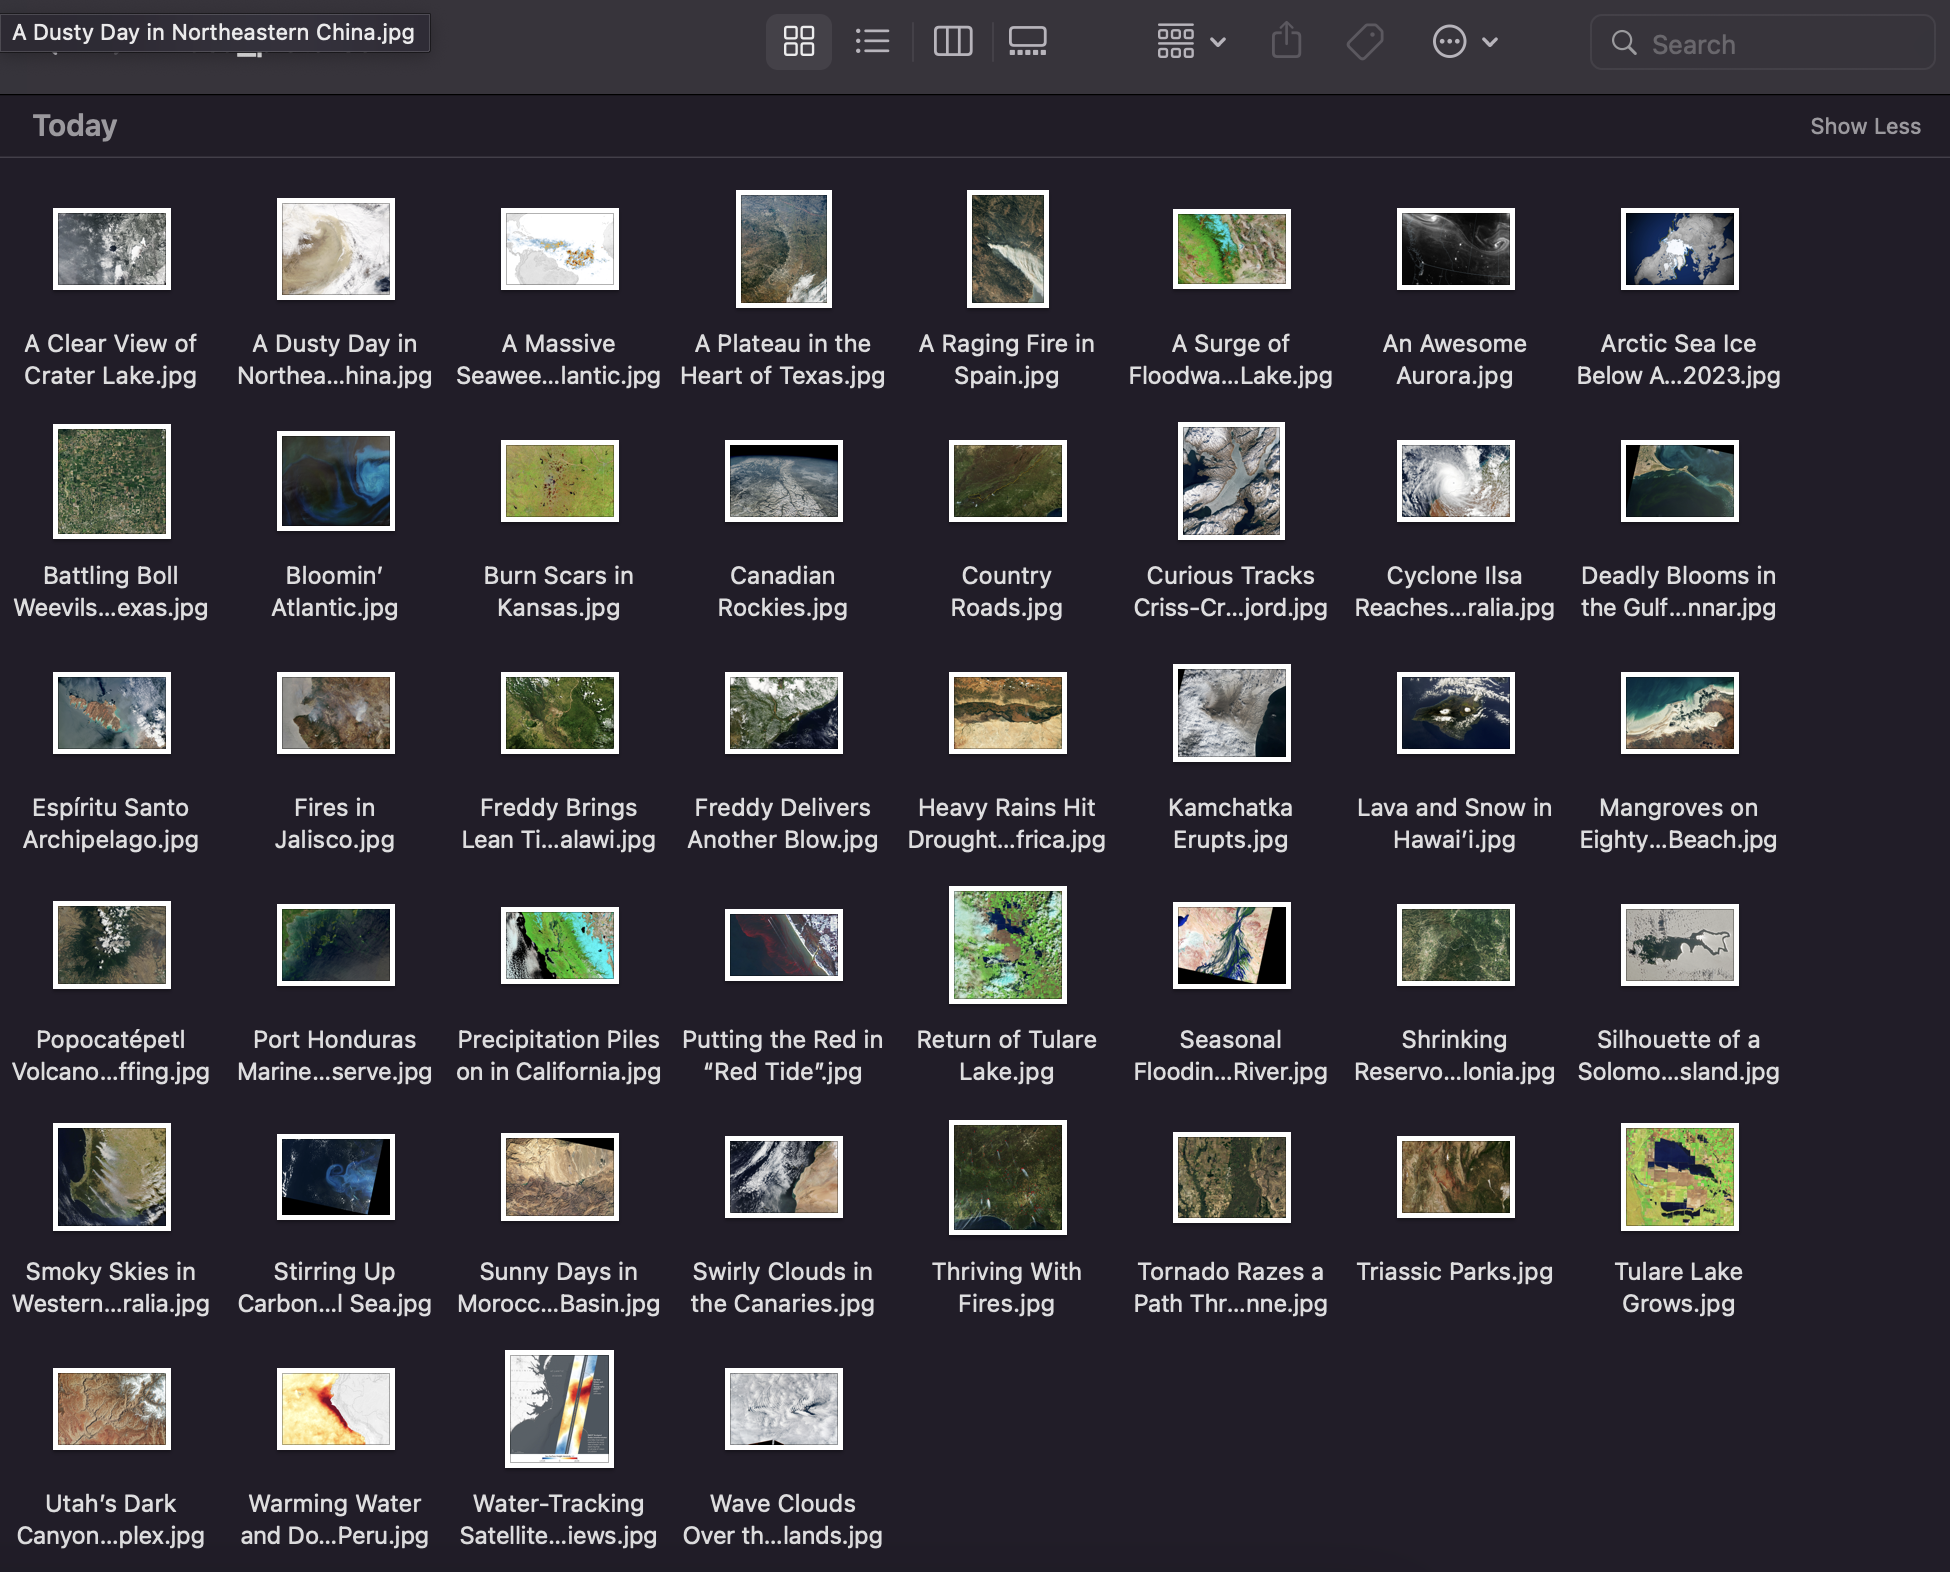

It remains to Create a dictionary where the keys are the images/titles and the values are the images’ descriptions.

In [320]:
dict_assignment3 = {}
for index in df.index:
    dict_assignment3[html.unescape(df['Title'][index])] = html.unescape(str(df['Description'][index]))
# Writing the json file:

file_json = 'assignment3_Nasa_dict.json'
with open(file_json, "w") as outfile:
    json.dump(dict_assignment3, outfile)
    print(file_json, 'is written succesfully!')

dict_assignment3

assignment3_Nasa_dict.json is written succesfully!


{'Deadly Blooms in the Gulf of Mannar': 'Though <em>Noctiluca scintillans</em> blooms have long been noted in the shallow gulf, they have become more frequent and intense since 2019.',
 'Popocatépetl Volcano Keeps on Puffing': 'One of Mexico’s most active volcanoes continues to put on a show for satellites and astronauts.',
 'Espíritu Santo Archipelago': 'The island group off Mexico’s Baja California Sur has eroded slowly, preserving evidence of past human activity.',
 'Tulare Lake Grows': 'Flooding in the California lakebed continues to spread as spring brings snowmelt from the Sierras.',
 'Freddy Brings Lean Times to Malawi': 'Hunger is on the rise in Malawi after the tropical cyclone devastated crops in the southern part of the country.',
 'Fires in Jalisco': 'Hundreds of wildfires have burned in the Mexican state in 2023.',
 'Utah’s Dark Canyon Complex': 'Petroglyphs, hanging gardens, and deep canyons make this remote landscape a notable part of Bears Ears National Monument.',
 'Se

### _THE END OF ASSIGNMENT 3_